In [42]:
import os 
import re

from pdfquery import PDFQuery
import fitz
import pandas as pd
from utils import (
    convertir_pdf_a_xml
)
from ProcesamientoAG.scrap_pdf_AG import (
    check_format,
    get_PESO_BRUTO,
    get_ADUANA_DESTINO,
    get_CRT,
    get_DDT,
    get_DESTINATARIO,
    get_DESTINO,
    get_SEMI,
    get_TRACTOR,
    get_TRANSPORTE_CAMPO_1,
    get_TRANSPORTE_CAMPO_9,
)
from utils import (
    listar_archivos_pdf
)

def test_func(function):
    for i in archivos[:10:2]:
        pdf = PDFQuery(i)
        pdf.load(0)
        print(function(pdf))
        

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


In [31]:
archivos = listar_archivos_pdf('C:/Users/Usuario/Desktop/Rapha/pdfs-to-excel/testing-data/03-MARZO-2025')


In [32]:
archivos

['C:\\Users\\Usuario\\Desktop\\Rapha\\pdfs-to-excel\\testing-data\\03-MARZO-2025\\25AR060556X.pdf',
 'C:\\Users\\Usuario\\Desktop\\Rapha\\pdfs-to-excel\\testing-data\\03-MARZO-2025\\25AR067108X.pdf',
 'C:\\Users\\Usuario\\Desktop\\Rapha\\pdfs-to-excel\\testing-data\\03-MARZO-2025\\25AR072512D.pdf',
 'C:\\Users\\Usuario\\Desktop\\Rapha\\pdfs-to-excel\\testing-data\\03-MARZO-2025\\25AR072520C.pdf',
 'C:\\Users\\Usuario\\Desktop\\Rapha\\pdfs-to-excel\\testing-data\\03-MARZO-2025\\25AR075003B.pdf',
 'C:\\Users\\Usuario\\Desktop\\Rapha\\pdfs-to-excel\\testing-data\\03-MARZO-2025\\25AR078467S.pdf',
 'C:\\Users\\Usuario\\Desktop\\Rapha\\pdfs-to-excel\\testing-data\\03-MARZO-2025\\25AR078468T.pdf',
 'C:\\Users\\Usuario\\Desktop\\Rapha\\pdfs-to-excel\\testing-data\\03-MARZO-2025\\25AR078476S.pdf',
 'C:\\Users\\Usuario\\Desktop\\Rapha\\pdfs-to-excel\\testing-data\\03-MARZO-2025\\25AR078481Y.pdf',
 'C:\\Users\\Usuario\\Desktop\\Rapha\\pdfs-to-excel\\testing-data\\03-MARZO-2025\\25AR078493R.pdf',


In [5]:

archivo = archivos[20]

In [25]:
convertir_pdf_a_xml(archivo, output_path='data/archivo.xml')

'data/archivo.xml'

In [14]:
for archivo in archivos:
    pdf = PDFQuery(archivo)
    pdf.load(0)

    print(get_TRANSPORTE_CAMPO_99(pdf))


NameError: name 'get_TRANSPORTE_CAMPO_99' is not defined

In [71]:


import re
import fitz
import pandas as pd

def get_TRANSPORTE_CAMPO_9_1(archivos: list[str]):
    """_summary_

    Args:
        archivo (str): _description_

    Returns:
        _type_: _description_
    """
    
    data = []
    for archivo in archivos:
    
        pdf = fitz.open(archivo).load_page(0)
        # Load the page content as text
        page_text = pdf.get_text("text")

        texto_antes = 'CAMINH?O ORIGINAL : Nome e endereco do proprietario\n9\n'
        texto_despues = 'CAMION SUBSTITUTO : Nombre y domicilio del propietario'

        pattern = re.escape(texto_antes) + r"(.*?)" + re.escape(texto_despues)
        
        matches = re.findall(pattern, page_text, re.DOTALL)

        data.append(matches[0].split('- ')[0].strip()) if matches else None
    
    return data

get_TRANSPORTE_CAMPO_9_1(archivos)


['LOGI?STICA INTERNACIONAL F B SPA',
 'CORTEZ LEONARDO MARIANO',
 'EXPRESO EL AGUILUCHO S.A.',
 'EXPRESO EL AGUILUCHO S.A.',
 'MOYA Y COMPANIA LTDA',
 'TRANSPORTE MC CORMACK',
 'PE?A JAIME OSCAR OMAR',
 'TRANS PACHIS S.R.L.',
 'HUGO WALTER OLAVERRY RIVERO S.A',
 'HUGO WALTER OLAVERRY RIVERO S.A',
 'HUGO WALTER OLAVERRY RIVERO S.A',
 'VARONA RAMIRO HERNAN',
 'CARLOS E. RIFFEL',
 'HUGO WALTER OLAVERRY RIVERO S.A',
 'OTERO  ROLANDO ARIEL',
 'TIEMPO NUEVO SRL',
 'EXPRESO EL AGUILUCHO S.A.',
 'EXPRESO EL AGUILUCHO S.A.',
 'EXPRESO EL AGUILUCHO S.A.',
 'EXPRESO EL AGUILUCHO S.A.',
 'EXPRESO EL AGUILUCHO S.A.',
 'EXPRESO EL AGUILUCHO S.A.',
 'EMPRESA DE TTES. DON PEDRO S.R.L.',
 'EMPRESA DE TTES. DON PEDRO S.R.L.',
 'EMPRESA DE TTES. DON PEDRO S.R.L.',
 'EMPRESA DE TTES. DON PEDRO S.R.L.',
 'EMPRESA DE TTES. DON PEDRO S.R.L.',
 'EMPRESA DE TTES. DON PEDRO S.R.L.',
 'EMPRESA DE TTES. DON PEDRO S.R.L.',
 'CORIA EDGARDO JOSE',
 'PEREZ CARLOS ANDRES',
 'LOGISTICA TRANSLON SAS',
 'PAVEZ RUBEN ARIE

In [13]:
def get_PRECINTO(pdf: PDFQuery):
    
    text  =  pdf.pq('LTTextLineHorizontal:contains("37 Numero de los precintos")').next().text()
    return text

In [14]:
for archivo in archivos:
    pdf = PDFQuery(archivo)
    pdf.load(0)
    print(get_PRECINTO(pdf))

JF49888
JI06242
JF49880
JF49881
JF49889
JF51324/25
JF51326


c:\Users\ferna\AppData\Local\Programs\Python\Python313\Lib\site-packages\pdfquery\pdfquery.py:475: SyntaxWarning: invalid escape sequence '\W'
  k = re.sub('\W', '_', k)


KeyboardInterrupt: 

<Axes: ylabel='KILOS BRUTOS'>

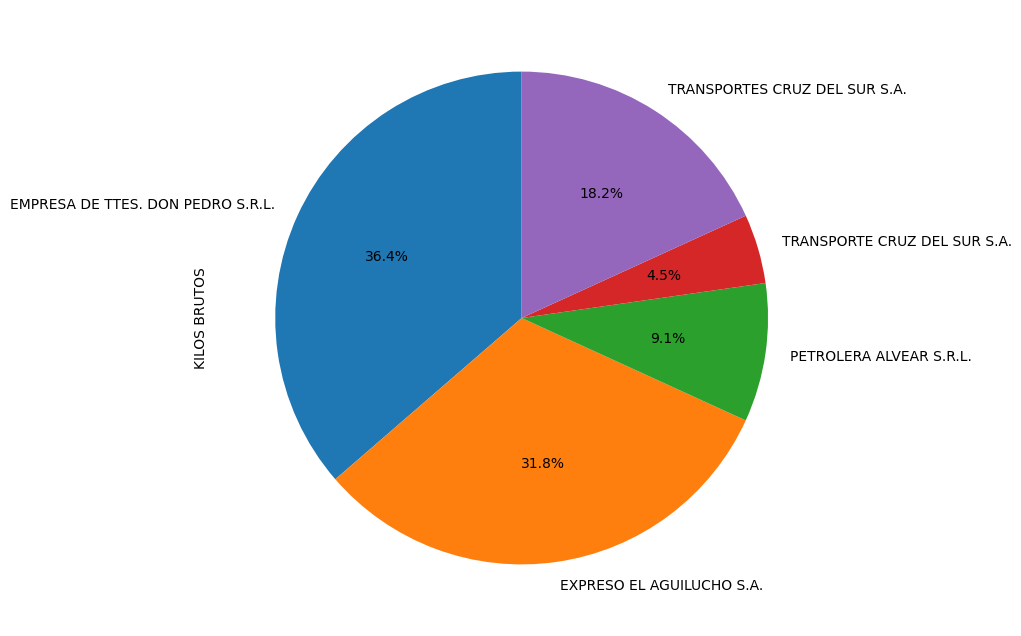

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('data/agtest1.xlsx',sheet_name='Sheet1', header=0, engine='openpyxl')
df

# hacer un grafico de torta con TRANSPORTE CAMPO 1 Y QUE SUME POR CDA UNO CANTIDAD BULTOS, ponemelo en cantidad
df.groupby('TRANSPORTE CAMPO 1')['KILOS BRUTOS'].sum().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8))



In [2]:
def get_EXPORTADOR(pdf: PDFQuery):
    text  =  pdf.pq('LTTextLineHorizontal:contains("/ Remetente")').next().text()
    return text

In [25]:
data = []
for archivo in archivos:
    pdf = PDFQuery(archivo)
    pdf.load(0)
    data.append(get_DESTINATARIO(pdf))



KeyboardInterrupt: 

In [28]:
def get_DESTINATARIO(pdf: PDFQuery):
    text  =  pdf.pq('LTTextLineHorizontal:contains("34 Destinatario / Destinatario")').next().text()
    return text

pdf = PDFQuery(archivos[1])
pdf.load(0)
get_DESTINATARIO(pdf)

'RIO CHICO S.A.\nRUTA 3 Y SAN LORENZO 67 - RIO GRANDE - ARGENTINA'

In [62]:
data = []
for archivo in archivos:
    
    pdf = fitz.open(archivo).load_page(0)
        # Load the page content as text
    page_text = pdf.get_text("text")

    #print(page_text)

    texto_antes = '/ Destinatario'
    texto_despues = '35 Consignatario /Consignatario'
    pattern = re.escape(texto_antes) + r"(.*)" + re.escape(texto_despues)
    matches = re.findall(pattern, page_text, re.DOTALL)

    print(matches[0].split('\n')[1]) if matches else None
    print('----------------------------------------------------------------------')


PETROQUIMICA DOW S.A.
----------------------------------------------------------------------
RIO CHICO S.A.
----------------------------------------------------------------------
DOW BRASIL IND E COM DE PRODUTOS QUIMICOS LTDA.
----------------------------------------------------------------------
DOW BRASIL IND E COM DE PRODUTOS QUIMICOS LTDA.
----------------------------------------------------------------------
PETROQUIMICA DOW S.A.
----------------------------------------------------------------------
CARGILL URUGUAY S.A.
----------------------------------------------------------------------
CARGILL URUGUAY S.A.
----------------------------------------------------------------------
CARGILL URUGUAY S.A.
----------------------------------------------------------------------
CARGILL URUGUAY S.A.
----------------------------------------------------------------------
CARGILL URUGUAY S.A.
----------------------------------------------------------------------
CARGILL URUGUAY S.A.
---------

In [63]:
def get_DESTINATARIO(archivos: list[str]):
    data = []
    for archivo in archivos:
        
        pdf = fitz.open(archivo).load_page(0)
            # Load the page content as text
        page_text = pdf.get_text("text")

        #print(page_text)

        texto_antes = '/ Destinatario'
        texto_despues = '35 Consignatario /Consignatario'
        pattern = re.escape(texto_antes) + r"(.*)" + re.escape(texto_despues)
        matches = re.findall(pattern, page_text, re.DOTALL)

        data.append(matches[0].split('\n')[1] if matches else None)
    return data

get_DESTINATARIO(archivos)

['PETROQUIMICA DOW S.A.',
 'RIO CHICO S.A.',
 'DOW BRASIL IND E COM DE PRODUTOS QUIMICOS LTDA.',
 'DOW BRASIL IND E COM DE PRODUTOS QUIMICOS LTDA.',
 'PETROQUIMICA DOW S.A.',
 'CARGILL URUGUAY S.A.',
 'CARGILL URUGUAY S.A.',
 'CARGILL URUGUAY S.A.',
 'CARGILL URUGUAY S.A.',
 'CARGILL URUGUAY S.A.',
 'CARGILL URUGUAY S.A.',
 'CARGILL URUGUAY S.A.',
 'CARGILL URUGUAY S.A.',
 'CARGILL URUGUAY S.A.',
 'CARGILL URUGUAY S.A.',
 'CARGILL URUGUAY S.A.',
 'DOW BRASIL IND E COM DE PROD QUIMICOS',
 'DOW BRASIL IND E COM DE PROD QUIMICOS',
 'DOW BRASIL IND E COM DE PROD QUIMICOS',
 'DOW BRASIL IND E COM DE PROD QUIMICOS',
 'DOW BRASIL IND E COM DE PRODUTOS QUIMICOS LTDA.',
 'DOW BRASIL IND E COM DE PRODUTOS QUIMICOS LTDA.',
 'NOLAMIR  SA',
 'SM RESINAS URUGUAY SA',
 'SM RESINAS URUGUAY SA',
 'SM RESINAS URUGUAY SA',
 'SM RESINAS URUGUAY SA',
 'SM RESINAS URUGUAY SA',
 'SM RESINAS URUGUAY SA',
 'RIO CHICO S.A.',
 'RIO CHICO S.A.',
 'RIO CHICO S.A.',
 'RIO CHICO S.A.',
 'RIO CHICO S.A.',
 'RIO CHICO

In [65]:
def check_format(pdf: PDFQuery):
    """
    Verifica si el formato del PDF es correcto.


    Args:
        pdf (PDFQuery): instancia de PDFQuery del archivo PDF.
    """
    try:
        val = bool(pdf.pq('LTTextLineHorizontal:contains("Manifiesto Internacional de Carga por Carretera / Declaracion de Transito Aduanero")'))
        return val
    except Exception as e:
        raise ValueError(f"Error al verificar el formato del PDF: {e}")
    
pdf = PDFQuery(archivos[0])
pdf.load(0)    
check_format(pdf)

True

In [114]:
df = pd.read_excel('data/DATAAAANEWLAST.xlsx')

#df['PRODUCTO'] = #LOGICA EN BASE AL EXPORTADOR
    
    #SI EL EXPORTADOR ES	LA MERCADERIA ES
    #PBBPOLISUR SOCIEDAD DE RESPONS	POLIETILENO
    #UNIPAR INDUPA SAIC	POLICLORURO DE VINILO
    #COMPA?IA MEGA SOCIEDAD ANONIMA	GAS LICUADO
    #COMPA?IA MOLINERA DEL SUR S. A	SEMOLA DE TRIGO
    #TRANSPORTADORA DE GAS DEL SUR	GAS LICUADO
    #VITERRA ARGENTINA S.A.	ACEITE / PELLETS / LECITINA
    #LA NUEVA MANERA S.A.	HARINA DE TRIGO
    #SYNGENTA	ACEITE
    #SI NO CUMPLE CON LAS ANTERIORES	INDETERMINADO
    
def logica_PRODUCTO():
    pass

df


,FECHA CARGA,MIC - DTA,C.R.T.,D.D.T,EXPORTADOR,TRANSPORTE CAMPO 1,TRACTOR,SEMI,DESTINO,ADUANA DESTINO,KILOS BRUTOS,VALOR FOB,PRECINTO,descripcion_mercancia,TRANSPORTE CAMPO 9,DESTINATARIO
0,01/03/2025,25AR060556X,003AR3962025,25003EC01001056B,PBBPOLISUR SOCIEDAD DE RESPONS,MOYA Y COMPA?IA LIMITADA,SLHS12,PXDW52,SANTIAGO-CHILE,LOS ANDES-,27540.0,34560.00,JF49888,18 PALLETS CONTENIENDO 1.080 BOLSAS DE POLIETILENO QUE DICE CONTENER:()\nXB 81844.39 ENHANCED POLYETHYLENE RESIN - 25 KG BAG - 60 BAGS/PALLET()\nRESINA DE POLIETILENO XB 81844.39 - 60 BOLSAS/PALETA()\nPESO NETO: 27.000 KILOS()\nFACTURA 0110-00049065 - ORDEN 4009307775 - SHIPMENT: 45966911()\nESTA UNIDAD DEBE INGRESAR A PTLA()\nMARCAS: PBB/DOW - 1/18()\nPAIS DE ORIGEN Y PROCEDENCIA: ARGENTINA - LIMPIO A BORDO\nPOS. Arancelarias: 3901.40.00,LOGI?STICA INTERNACIONAL F B SPA,PETROQUIMICA DOW S.A.
1,06/03/2025,25AR067108X,003AR.0274/2025,25003EC01001088G,PBBPOLISUR SOCIEDAD DE RESPONS,TRANSPORTES CRUZ DEL SUR S.A.,HMQ414,LPW781,RIO GRANDE-ARGENTINA,RIO GRANDE-TERMINAL LOGISTICA RIO GRANDE,27540.0,28728.00,JI06242,18 PALLETS CONTENIENDO 1.080 BOLSAS DE POLIETILENO QUE DICEN CONTENER ()\nPE DOWLEX TG 2085B BG6025 KG - 374367()\n60 BAGS/PALLET - 1.080 BAGS OF 25 KG()\nPESO NETO: 27.000 KILOS()\nFACTURA PROFORMA 117118296 - ORDEN 117118296 ()\nMARCA: PBB/DOW - PAIS DE ORIGEN Y PROCEDENCIA: ARGENTINA()\nLIMPIO A BORDO\nPOS. Arancelarias: 3901.40.00,CORTEZ LEONARDO MARIANO,RIO CHICO S.A.
2,01/03/2025,25AR072512D,003AR.398.041351,25003EC03000664H,PBBPOLISUR SOCIEDAD DE RESPONS,EXPRESO EL AGUILUCHO S.A.,IZA100,FGF444,ITAJAI-BRASIL,1017500-URUGUAIANA-,27540.0,30240.00,JF49880,18 PALLETS CONTENIENDO 1.080 BOLSAS DE POLIETILENO QUE DICEN CONTENER()\nLLDPE 1613.11 POLYETHYLENE RESIN- 25 KG BAGS 60 BAGS ON A PALLET()\nPESO NETO: 27.000 KILOS()\nORDEN 4009299809 -FACTURA DE EXPORTACION 0110-00049104()\nMARCA: PBB/DOW - PAIS DE ORIGEN Y PROCEDENCIA: ARGENTINA-LIMPIO A BORDO\nPrimera Fraccion: S - MIC 1ra. Fraccion: 25AR072512D - Cant. Total Bultos: 36\nPOS. Arancelarias: 3901.40.00,EXPRESO EL AGUILUCHO S.A.,DOW BRASIL IND E COM DE PRODUTOS QUIMICOS LTDA.
3,01/03/2025,25AR072520C,003AR.398.041351,25003EC03000664H,PBBPOLISUR SOCIEDAD DE RESPONS,EXPRESO EL AGUILUCHO S.A.,NST431,FGP583,ITAJAI-BRASIL,1017500-URUGUAIANA-,27540.0,30240.00,JF49881,18 PALLETS CONTENIENDO 1.080 BOLSAS DE POLIETILENO QUE DICEN CONTENER()\nLLDPE 1613.11 POLYETHYLENE RESIN- 25 KG BAGS 60 BAGS ON A PALLET()\nPESO NETO: 27.000 KILOS()\nORDEN 4009299809 -FACTURA DE EXPORTACION 0110-00049104()\nMARCA: PBB/DOW - PAIS DE ORIGEN Y PROCEDENCIA: ARGENTINA-LIMPIO A BORDO\nPrimera Fraccion: N - MIC 1ra. Fraccion: 25AR072512D - Cant. Total Bultos: 36\nPOS. Arancelarias: 3901.40.00,EXPRESO EL AGUILUCHO S.A.,DOW BRASIL IND E COM DE PRODUTOS QUIMICOS LTDA.
4,01/03/2025,25AR075003B,003AR3932025,25003EC03000576J,PBBPOLISUR SOCIEDAD DE RESPONS,MOYA Y COMPA?IA LIMITADA,KRRV57,GRCX47,SANTIAGO-CHILE,LOS ANDES-,27540.0,31320.00,JF49889,18 PALLETS CONTENIENDO 1.080 BOLSAS DE POLIETILENO QUE DICE CONTENER:()\nDOWLEX(TM) NG 2038B POLYETHYLENE RESIN- 25 KG BAG - 60 BAGS/PALLET()\nRESINA DE POLIETILENO DOWLEX(TM) NG 2038B - BOLSA DE 25 KG - 60 BOLSAS/PALETA()\nPESO NETO: 27.000 KILOS()\nFACTURA DE EXPORTACION 0110-00049017 - ORDEN 4009185813 - SHIPMENT: 45908861()\nMARCAS: PBB/DOW - 1/18()\nESTA UNIDAD DEBE INGRESAR A PTLA()\nPAIS DE ORIGEN Y PROCEDENCIA: ARGENTINA - LIMPIO A BORDO\nPOS. Arancelarias: 3901.10.30,MOYA Y COMPANIA LTDA,PETROQUIMICA DOW S.A.
5,10/03/2025,25AR078467S,003AR148724164,25003EC01000543B,VITERRA ARGENTINA S.A.,OLAVERRY RIVERO HUGO WALTER S.A.,DQH366,LZH180,MONTEVIDEO-URUGUAY,FRAY BENTOS-,29380.0,4260.10,JF51324/25,"DICE CONTENER:()\n29,38 TONS NETAS DE PELLETS DE HARINA DE SEMILLA DE GIRASOL ARGENTINO A GRANEL()\nFACTURA NRO. 0055-00020088()\nPAIS DE ORIGEN Y PROCEDENCIA ARGENTINA.()\nLIMPIO A BORDO.()",TRANSPORTE MC CORMACK,CARGILL URUGUAY S.A.
6,10/03/2025,25AR078468T,003AR148724164,25003EC01000543B,VITERRA ARGENTINA S.A

In [67]:
def get_EXPORTADOR(pdf: PDFQuery):
    text  =  pdf.pq('LTTextLineHorizontal:contains("/ Remetente")').next().text()
    return text

In [69]:
data = []
for archivo in archivos:
    pdf = PDFQuery(archivo)
    pdf.load(0)
    data.append(get_EXPORTADOR(pdf))
    

In [91]:
import pandas as pd

df = pd.DataFrame({'EXPORTADOR':data})
df['EXPORTADOR'] = df['EXPORTADOR'].str.split('\n').str[0]
df

,EXPORTADOR
0,PBBPOLISUR SOCIEDAD DE RESPONS
1,PBBPOLISUR SOCIEDAD DE RESPONS
2,PBBPOLISUR SOCIEDAD DE RESPONS
3,PBBPOLISUR SOCIEDAD DE RESPONS
4,PBBPOLISUR SOCIEDAD DE RESPONS
5,VITERRA ARGENTINA S.A.
6,VITERRA ARGENTINA S.A.
7,VITERRA ARGENTINA S.A.
8,VITERRA ARGENTINA S.A.
9,VITERRA ARGENTINA S.A.


In [112]:

def get_NACIONALIDAD_TRANSPORTE(pdf: PDFQuery):
    
    
    text_element = pdf.pq('LTTextBoxHorizontal:contains("/ Nome e endereco do transportador ")').text()
    return text_element

data = []
archivoss = []
for archivo in archivos:
    pdf = PDFQuery(archivo)
    pdf.load(0)
    get_NACIONALIDAD_TRANSPORTE(pdf)
    data.append(get_NACIONALIDAD_TRANSPORTE(pdf))
    archivoss.append(archivo)


In [ ]:
df = pd.DataFrame({'ARCHIVOS':archivoss,'NACIONALIDAD_TRANSPORTE_X':data})

PAISES_MERCOSUR = ['ARGENTINA', 'BRASIL', 'PARAGUAY', 'URUGUAY', 'VENEZUELA', 'CHILE', 'BOLIVIA']    

df['NACIONALIDAD_TRANSPORTE_X'] = df['NACIONALIDAD_TRANSPORTE_X'].apply(
    lambda x: next((pais for pais in PAISES_MERCOSUR if pais in x), None)
)
df[df['NACIONALIDAD_TRANSPORTE_X'].isnull()]['ARCHIVOS'] # archivos que no tienen nacionalidad de transporte

58     C:\Users\Usuario\Desktop\Rapha\pdfs-to-excel\testing-data\03-MARZO-2025\25AR086162J.pdf
59     C:\Users\Usuario\Desktop\Rapha\pdfs-to-excel\testing-data\03-MARZO-2025\25AR086186P.pdf
60     C:\Users\Usuario\Desktop\Rapha\pdfs-to-excel\testing-data\03-MARZO-2025\25AR086196Z.pdf
160    C:\Users\Usuario\Desktop\Rapha\pdfs-to-excel\testing-data\03-MARZO-2025\25AR095590Y.pdf
170    C:\Users\Usuario\Desktop\Rapha\pdfs-to-excel\testing-data\03-MARZO-2025\25AR095745Z.pdf
173    C:\Users\Usuario\Desktop\Rapha\pdfs-to-excel\testing-data\03-MARZO-2025\25AR095874T.pdf
174    C:\Users\Usuario\Desktop\Rapha\pdfs-to-excel\testing-data\03-MARZO-2025\25AR095893U.pdf
175    C:\Users\Usuario\Desktop\Rapha\pdfs-to-excel\testing-data\03-MARZO-2025\25AR095911L.pdf
249    C:\Users\Usuario\Desktop\Rapha\pdfs-to-excel\testing-data\03-MARZO-2025\25AR105576K.pdf
262    C:\Users\Usuario\Desktop\Rapha\pdfs-to-excel\testing-data\03-MARZO-2025\25AR107667N.pdf
263    C:\Users\Usuario\Desktop\Rapha\pdfs-to-exce